<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn import datasets
import time

from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [ ]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [ ]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [ ]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [ ]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

### Prepare data to train

In [ ]:
# display column names
print(full_df.columns)

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio',
       'Packaged Single Zone - gas boiler', 'Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump', 'Courthouse',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed', 'Metal', 'OE'],
      dtype='object')


In [ ]:
def standardize(variable):
  std = np.std(variable)
  mean = np.mean(variable)
  return (variable - mean) / std

In [ ]:
# standarize the numerical columns
pred['Orientation'] = standardize(pred['Orientation'])
pred['nonMassWallR [m^2-K/W]'] = standardize(pred['nonMassWallR [m^2-K/W]'])
pred['MassWallR [m^2-K/W]'] = standardize(pred['MassWallR [m^2-K/W]'])
pred['RoofR [m^2-K/W]'] = standardize(pred['RoofR [m^2-K/W]'])
pred['ExteriorFloorR [m^2-K/W]'] = standardize(pred['ExteriorFloorR [m^2-K/W]'])
pred['WWRnorth'] = standardize(pred['WWRnorth'])
pred['WWRwest'] = standardize(pred['WWRwest'])
pred['WWRsouth'] = standardize(pred['WWRsouth'])
pred['WWReast'] = standardize(pred['WWReast'])
pred['SHGC'] = standardize(pred['SHGC'])
pred['WindowR [m^2-K/W]'] = standardize(pred['WindowR [m^2-K/W]'])
pred['numFloor'] = standardize(pred['numFloor'])
pred['AspectRatio'] = standardize(pred['AspectRatio'])
pred['VolumeToFacadeRatio'] = standardize(pred['VolumeToFacadeRatio'])

# standarize the target column
resp['OE'] = standardize(resp['OE'])

In [ ]:
pred.describe()

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
count,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,3.250000e+04,...,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000
mean,-3.279428e-18,1.869274e-17,4.837156e-18,-1.464811e-17,3.541782e-17,-2.475968e-17,-4.350708e-17,-2.230011e-17,-9.073084e-18,-5.290811e-17,...,0.099569,0.102954,0.100431,0.100338,0.097077,0.099108,0.333169,0.222492,0.222215,0.222123
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,0.299429,0.303903,0.300578,0.300455,0.296067,0.298811,0.471354,0.415926,0.415742,0.415680
min,-1.725836e+00,-1.619260e+00,-3.945685e-01,-1.344635e+00,-1.988326e+00,-1.572052e+00,-1.570179e+00,-1.571273e+00,-1.569881e+00,-1.460457e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.624125e-01,-6.005186e-01,-3.945685e-01,-7.994108e-01,-5.946456e-01,-8.545233e-01,-8.531467e-01,-8.540560e-01,-8.529880e-01,-1.172006e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.011313e-03,-1.183144e-01,-3.945685e-01,-2.541861e-01,3.081437e-01,-1.369940e-01,-1.361142e-01,-1.368392e-01,-1.360948e-01,7.029233e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.644351e-01,8.121359e-01,-3.945685e-01,2.910387e-01,8.046777e-01,1.147006e+00,1.146996e+00,1.146602e+00,1.146767e+00,7.029233e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.727859e+00,2.129708e+00,4.259057e+00,2.825094e+00,1.397133e+00,1.449123e+00,1.448905e+00,1.448588e+00,1.448616e+00,9.913741e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
resp.describe()

,OE
count,3.250000e+04
mean,-1.781823e-17
std,1.000015e+00
min,-8.673137e-01
25%,-5.048935e-01
50%,-3.389000e-01
75%,7.490479e-02
max,3.938391e+00


In [ ]:
pred_normalized = np.array(pred)
print(pred_normalized.shape)
resp_normalized = np.array(resp)
print(resp_normalized.shape)

(32500, 34)
(32500, 1)


In [ ]:
# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(pred_normalized,resp_normalized, test_size = 0.2)

### Train NN

In [ ]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import time
from datetime import datetime

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torchvision.ops import MLP

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, data in enumerate(dataloader):
        X, y = data[:,:-output_dim], data[:, -output_dim:]
        # Compute prediction and loss
        pred = model(X)
        # print('pred',pred)
        # print('y',y)
        loss = loss_fn(pred, y)
        # break
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    return loss

In [ ]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for data in dataloader:
            X, y = data[:,:-output_dim], data[:, -output_dim:]
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    # correct /= size
    print(f"Test Avg loss: {test_loss:>8f} \n")

    return test_loss

In [ ]:
class RegressionMLP(nn.Module):
    def __init__(
        self, n_hidden_layers=1, n_hidden_neurons=[64] * 8 , input_dim=1, output_dim=1
    ):
        super(RegressionMLP, self).__init__()
        self.layer_in = nn.Sequential(nn.Linear(input_dim, n_hidden_neurons[0]), nn.ReLU())
        hidden_layers = []
        for i in range(len(n_hidden_neurons) - 1):
            hidden_layers.append(nn.Linear(n_hidden_neurons[i], n_hidden_neurons[i + 1]))
            hidden_layers.append(nn.ReLU())
        self.layers_mid = nn.Sequential(*hidden_layers)
        self.layer_out = nn.Sequential(nn.Linear(n_hidden_neurons[-1], output_dim))

    def forward(self, x):
        x = self.layer_in(x)
        x = self.layers_mid(x)
        x = self.layer_out(x)

        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
input_dim = 34
output_dim = 1

In [ ]:
nn_regressor = RegressionMLP(
    n_hidden_neurons=[128, 128, 128, 128, 128, 512, 512, 512, 512, 512, 128, 128, 128, 128, 128], input_dim=input_dim, output_dim=output_dim
).to(device)
print(nn_regressor)

RegressionMLP(
  (layer_in): Sequential(
    (0): Linear(in_features=34, out_features=128, bias=True)
    (1): ReLU()
  )
  (layers_mid): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=512, bias=True)
    (11): ReLU()
    (12): Linear(in_features=512, out_features=512, bias=True)
    (13): ReLU()
    (14): Linear(in_features=512, out_features=512, bias=True)
    (15): ReLU()
    (16): Linear(in_features=512, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in_features=512, out_features=128, bias=True)
    (19): ReLU()
    (20): Linear(in_features=128, out_features=128, bias=Tru

In [ ]:
optimizer = torch.optim.Adam(
    nn_regressor.parameters(), lr=1e-3
)  # lr is the learning rate

In [ ]:
batch_size = 25

# need to convert input data from numpy ndarrays to PyTorch tensors and cast them to the GPU
x_train_tensor = torch.tensor(X_train).to(device).float()
y_train_tensor = torch.tensor(Y_train).to(device).float()
x_test_tensor = torch.tensor(X_test).to(device).float()
y_test_tensor = torch.tensor(Y_test).to(device).float()

In [ ]:
train_dataloader = DataLoader(torch.cat((x_train_tensor, y_train_tensor),1), batch_size=batch_size, shuffle = True)
test_dataloader = DataLoader(torch.cat((x_test_tensor, y_test_tensor),1), batch_size=batch_size, shuffle = True)

In [ ]:
n_epochs = 500 # to improve loss, increase this

loss_fn = nn.MSELoss()

In [ ]:
training_losses = []
testing_losses = []

for t in range(n_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, nn_regressor, loss_fn, optimizer)
    print(f"train loss: {train_loss:>7f}")
    training_losses.append(train_loss.cpu().data.numpy())
    test_loss = test_loop(test_dataloader, nn_regressor, loss_fn)
    testing_losses.append(test_loss)
print("Done!")

Epoch 1
-------------------------------


train loss: 0.018299
Test Avg loss: 0.025419 

Epoch 2
-------------------------------
train loss: 0.002877
Test Avg loss: 0.003476 

Epoch 3
-------------------------------
train loss: 0.001987
Test Avg loss: 0.002783 

Epoch 4
-------------------------------
train loss: 0.001215
Test Avg loss: 0.002623 

Epoch 5
-------------------------------
train loss: 0.002306
Test Avg loss: 0.002097 

Epoch 6
-------------------------------
train loss: 0.001119
Test Avg loss: 0.002606 

Epoch 7
-------------------------------
train loss: 0.013736
Test Avg loss: 0.007127 

Epoch 8
-------------------------------
train loss: 0.002558
Test Avg loss: 0.001814 

Epoch 9
-------------------------------
train loss: 0.003230
Test Avg loss: 0.002348 

Epoch 10
-------------------------------
train loss: 0.001003
Test Avg loss: 0.001848 

Epoch 11
-------------------------------
train loss: 0.002257
Test Avg loss: 0.001632 

Epoch 12
-------------------------------
train loss: 0.002646
Test Avg loss: 0.00

KeyboardInterrupt: 

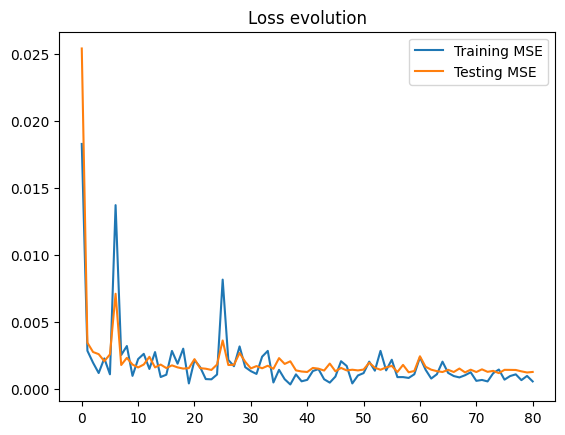

In [ ]:
plt.title("Loss evolution")
plt.plot(training_losses, label="Training MSE")
plt.plot(testing_losses,  label="Testing MSE")
plt.legend()

In [ ]:
# Save model
date = datetime.now().strftime('%Y%m%d%H%M')
fileName_NN = "OperationalNNModel" + str(date) + ".pkl"
model_path = "C:\_SchoolWork\DDes_first_year\CS109a\Final Project\CS109A_Final\Milestone4\Lucy" + fileName_NN

torch.save(nn_regressor, model_path)

### Load NN Model for plotting

In [ ]:
# Loading NN Model
nn_model = torch.load('C:\_SchoolWork\DDes_first_year\CS109a\Final Project\CS109A_Final\Milestone4\Lucy\LucyOperationalNNModel202311221123.pkl', map_location=torch.device('cpu'))
nn_model.eval()

RegressionMLP(
  (layer_in): Sequential(
    (0): Linear(in_features=34, out_features=128, bias=True)
    (1): ReLU()
  )
  (layers_mid): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=512, bias=True)
    (11): ReLU()
    (12): Linear(in_features=512, out_features=512, bias=True)
    (13): ReLU()
    (14): Linear(in_features=512, out_features=512, bias=True)
    (15): ReLU()
    (16): Linear(in_features=512, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in_features=512, out_features=128, bias=True)
    (19): ReLU()
    (20): Linear(in_features=128, out_features=128, bias=Tru

In [ ]:
Y_predict_NN_train = nn_model.to("cpu")(torch. from_numpy(X_train).float()).detach().numpy()
Y_predict_NN_test = nn_model.to("cpu")(torch. from_numpy(X_test).float()).detach().numpy()

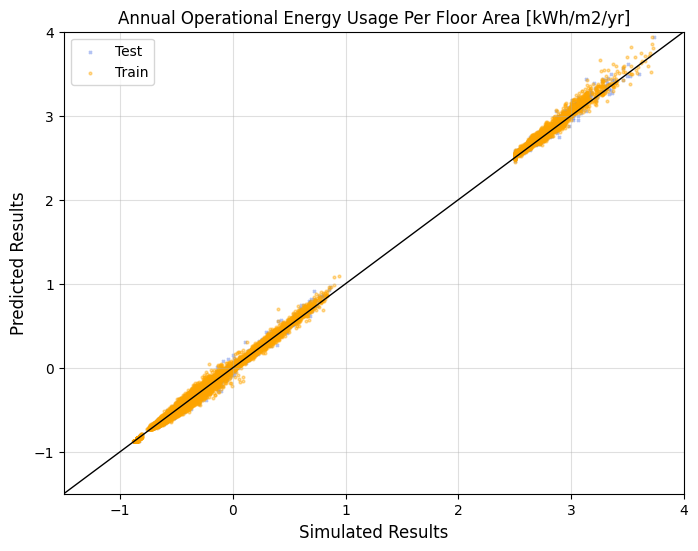

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));


xpoints_cs = ypoints_cs = ax.set_xlim(-1.5,4)



# xpoints_up = np.arange(0, 350, 10)
# ypoints_up = xpoints_up * 1.1
# xpoints_down = np.arange(0, 350, 10)
# ypoints_down = xpoints_down * 0.9
# ypoints_up_2 = xpoints_up * 1.2
# ypoints_down_2 = xpoints_down * 0.8


ax.scatter(Y_predict_NN_test, Y_test, alpha=0.4, c='royalblue', label='Test', marker='x', s=4)
ax.scatter(Y_predict_NN_train, Y_train, alpha=0.4, c='orange', label='Train', marker='o', s=4)
ax.plot(xpoints_cs, ypoints_cs, color='k', lw=1, scalex=False, scaley=False)
# ax.plot(xpoints_up, ypoints_up, color='k', lw=0.8, ls='--', scalex=False, scaley=False, label='+/- 10%')
# ax.plot(xpoints_down, ypoints_down, color='k', lw=0.8, ls='--', scalex=False, scaley=False)
# ax.plot(xpoints_up, ypoints_up_2, color='grey', lw=0.8, ls='--', scalex=False, scaley=False, label='+/- 20%')
# ax.plot(xpoints_down, ypoints_down_2, color='grey', lw=0.8, ls='--', scalex=False, scaley=False)
ax.set_ylim(-1.5,4)
ax.legend()



ax.grid(":", alpha=0.4);
ax.set_title('Annual Operational Energy Usage Per Floor Area [kWh/m2/yr]', fontsize=12);
ax.set_xlabel("Simulated Results", fontsize=12);
ax.set_ylabel("Predicted Results", fontsize=12);



plt.show()
plt.tight_layout();